In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import holoviews as hv
import geoviews as gv
import cartopy
from bokeh.models import WMTSTileSource

from cartopy import crs
from cartopy import feature as cf
from geoviews import feature as gf
import seaborn as sns
hv.notebook_extension('bokeh')
%output backend='bokeh'
%opts Feature [projection=crs.PlateCarree()]
%matplotlib inline

## American Community Survey Immigration Data

* A large proportion of taxi drivers are immigrants compared to the general population
* Looking at American Community Survey from 2014 data indicating birth in the United States or abroad at the block group level, and merging this with the locations of residential parking tickets given to taxis 

In [16]:
chi_res_tix = pd.read_csv('taxi_ticket_data/immigration_acs_data/chi_bg_res_tix_join.csv')
print(chi_res_tix.shape)
print(chi_res_tix.dtypes)
chi_res_tix.head()

(1678, 7)
gid              int64
gisjoin         object
total_pop        int64
native_pop       int64
forgn_pop        int64
forgn_pct      float64
res_tickets      int64
dtype: object


gid          gisjoin  total_pop  native_pop  forgn_pop  forgn_pct  \
0   251  G17003105203003       1129         718        411    0.36404   
1  2026  G17003102420002       1802        1515        287    0.15927   
2   264  G17003103510001       1011         970         41    0.04055   
3  1070  G17003103907002       1466        1377         89    0.06071   
4  1350  G17003103812002       1302        1265         37    0.02842   

   res_tickets  
0            1  
1            3  
2           21  
3           18  
4           23

In [17]:
chi_res_tix_high = chi_res_tix[chi_res_tix['res_tickets'] > 50]
print(chi_res_tix_high.shape)
chi_res_tix_high.head()

(151, 7)


gid          gisjoin  total_pop  native_pop  forgn_pop  forgn_pct  \
16  1283  G17003107608033       1807         876        931    0.51522   
33  1171  G17003100315013       1221         867        354    0.28993   
43  1582  G17003101502002       1665        1008        657    0.39459   
49   489  G17003100106002        844         599        245    0.29028   
56   325  G17003104601004        798         586        212    0.26566   

    res_tickets  
16          343  
33           79  
43          224  
49          120  
56           57

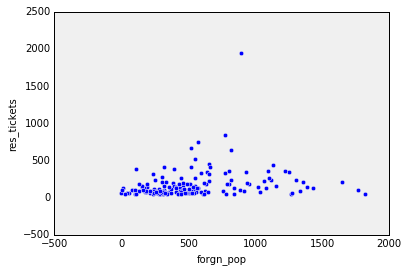

In [18]:
chi_res_tix_high.plot(x='forgn_pop', y='res_tickets', kind='scatter')

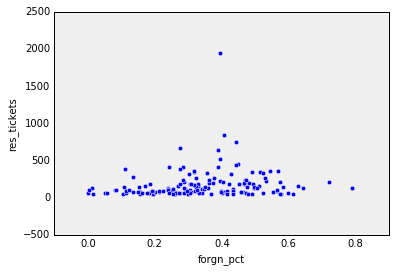

In [5]:
chi_res_tix_high.plot(x='forgn_pct', y='res_tickets', kind='scatter')

In [6]:
print('Total block groups: {}'.format(chi_res_tix['gid'].count()))
print('Total block groups with more than 300 residential tickets: {}'.format(chi_res_tix[chi_res_tix['res_tickets'] > 300]['gid'].count()))

Total block groups: 1678
Total block groups with more than 300 residential tickets: 23


In [7]:
mean_foreign_pop = chi_res_tix['forgn_pop'].mean()
print('Mean foreign-born pop for all block groups: {}'.format(mean_foreign_pop))
high_res_tix_bg = chi_res_tix[chi_res_tix['res_tickets'] > 300]
print('Mean foreign-born pop for highest residential tickets: {}'.format(high_res_tix_bg['forgn_pop'].mean()))

Mean foreign-born pop for all block groups: 286.1829559
Mean foreign-born pop for highest residential tickets: 701.652173913


In [8]:
mean_foreign_pop = chi_res_tix['forgn_pct'].mean()
print('Mean foreign-born % for all block groups: {}'.format(mean_foreign_pop))
high_res_tix_bg = chi_res_tix[chi_res_tix['res_tickets'] > 300]
print('Mean foreign-born % for highest residential tickets: {}'.format(high_res_tix_bg['forgn_pct'].mean()))

Mean foreign-born % for all block groups: 0.200874755078
Mean foreign-born % for highest residential tickets: 0.384797826087


In [9]:
print('Total block groups: {}'.format(chi_res_tix['gid'].count()))
print('Total block groups with more than 200 residential tickets: {}'.format(chi_res_tix[chi_res_tix['res_tickets'] > 200]['gid'].count()))

Total block groups: 1678
Total block groups with more than 200 residential tickets: 37


In [10]:
chi_res_tix.describe()

/Library/Python/2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


gid    total_pop   native_pop    forgn_pop    forgn_pct  \
count  1678.000000  1678.000000  1678.000000  1678.000000  1674.000000   
mean   1171.135876  1296.116806  1009.933850   286.182956     0.200875   
std     668.476487   602.039041   483.107358   302.071582     0.171926   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     605.250000   896.250000   704.250000    40.000000          NaN   
50%    1171.500000  1211.500000   938.000000   192.000000          NaN   
75%    1765.750000  1583.000000  1253.000000   446.000000          NaN   
max    2330.000000  8881.000000  7963.000000  1822.000000     0.789860   

       res_tickets  
count  1678.000000  
mean     23.293802  
std      77.538134  
min       1.000000  
25%       2.000000  
50%       5.000000  
75%      14.000000  
max    1940.000000

In [11]:
res_tix_300 = chi_res_tix[chi_res_tix['res_tickets'] > 300]
res_tix_300 = res_tix_300.sort_values('res_tickets', ascending=False)
res_tix_300.head()

gid          gisjoin  total_pop  native_pop  forgn_pop  forgn_pct  \
1236  1315  G17003100209021       2261        1366        895    0.39584   
125    879  G17003100204003       1908        1134        774    0.40566   
506    424  G17003108080022       1286         717        569    0.44246   
1079  1581  G17003101005005       1897        1376        521    0.27464   
1050   483  G17003100107011       2105        1288        817    0.38812   

      res_tickets  
1236         1940  
125           839  
506           754  
1079          669  
1050          646

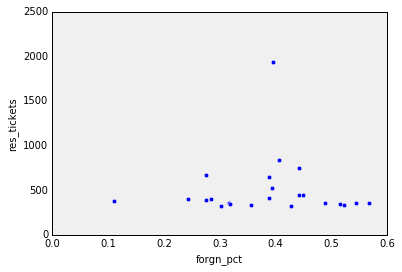

In [12]:
res_tix_300.plot(x='forgn_pct', y='res_tickets', kind='scatter')

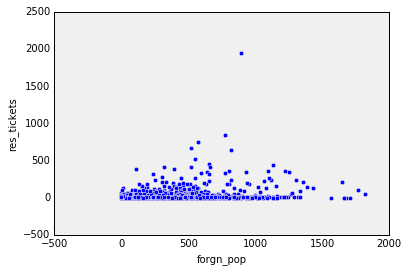

In [13]:
chi_res_tix.plot(x='forgn_pop', y='res_tickets', kind='scatter')

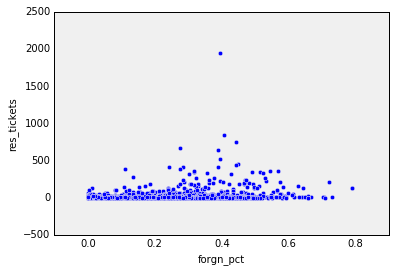

In [14]:
chi_res_tix.plot(x='forgn_pct', y='res_tickets', kind='scatter')

## Top Wards for Residential Tickets

* The top wards for residential parking taxi tickets are those which contain some of the largest immigrant enclaves in Chicago (in particular the area around Devon Ave's South Asian community around the 40th and 50th)

In [19]:
ward_tickets = pd.read_csv('taxi_ticket_data/taxi_tickets_by_ward.csv')
print(ward_tickets.shape)
res_ward_tickets = ward_tickets[ward_tickets['Violation Code'] == '0964170A']
print(res_ward_tickets.shape)
ward_tickets_grouped = res_ward_tickets.groupby(['Ward'])['Ticket Number'].count()
ward_tickets_grouped.sort_values(ascending=False, inplace=True)

(261936, 16)
(39096, 16)


/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Top 5 wards have 21724 taxi residential parking tickets
All other wards combined have 17372 taxi residential parking tickets


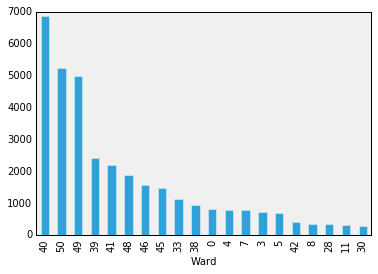

In [20]:
ward_top_5_tix = ward_tickets_grouped[:5].sum()
other_ward_tix = ward_tickets_grouped[5:].sum()
print('Top 5 wards have {} taxi residential parking tickets'.format(ward_top_5_tix))
print('All other wards combined have {} taxi residential parking tickets'.format(other_ward_tix))
ward_tickets_grouped[:20].plot(kind='bar')

In [21]:
# Converting to float for GeoViews display
chi_res_tix = pd.read_csv('taxi_ticket_data/immigration_acs_data/chi_bg_res_tix_join.csv')

chi_res_tix['forgn_pop'] = chi_res_tix['forgn_pop'].astype(float)
chi_res_tix['res_tickets'] = chi_res_tix['res_tickets'].astype(float)
chi_res_tix['forgn_pct'] = chi_res_tix['forgn_pct'] * 100
chi_res_tix = chi_res_tix.dropna()
print(chi_res_tix.dtypes)
print(chi_res_tix['res_tickets'].count())
print(chi_res_tix['forgn_pct'].count())
chi_res_tix.head()

gid              int64
gisjoin         object
total_pop        int64
native_pop       int64
forgn_pop      float64
forgn_pct      float64
res_tickets    float64
dtype: object
1674
1674


gid          gisjoin  total_pop  native_pop  forgn_pop  forgn_pct  \
0   251  G17003105203003       1129         718      411.0     36.404   
1  2026  G17003102420002       1802        1515      287.0     15.927   
2   264  G17003103510001       1011         970       41.0      4.055   
3  1070  G17003103907002       1466        1377       89.0      6.071   
4  1350  G17003103812002       1302        1265       37.0      2.842   

   res_tickets  
0          1.0  
1          3.0  
2         21.0  
3         18.0  
4         23.0

### Block Groups by Residential Tickets

In [22]:
%%opts Shape (cmap='YlOrRd', line_color='grey', line_width=0.1) [xaxis=None yaxis=None tools=['hover'] width=600 height=500]
bg_shapes = cartopy.io.shapereader.Reader('taxi_ticket_data/immigration_acs_data/chi_block_groups.shp')
res_tix = hv.Dataset(chi_res_tix)
gv.Shape.from_records(bg_shapes.records(), res_tix, on='gisjoin', value='res_tickets',
                      index=['total_pop', 'native_pop', 'forgn_pop', 'forgn_pct', 'res_tickets'], crs=crs.PlateCarree()) * gv.WMTS(WMTSTileSource(url='https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'))

:Overlay
   .NdOverlay.I :NdOverlay   [total_pop,native_pop,forgn_pop,forgn_pct,res_tickets]
      :Shape   [Longitude,Latitude]   (res_tickets)
   .WMTS.I      :WMTS   [Longitude,Latitude]

### Block Groups by Foreign-Born % of Population

In [27]:
%%opts Shape (cmap='YlOrRd', line_color='grey', line_width=0.1) [xaxis=None yaxis=None tools=['hover'] width=600 height=500]
bg_shapes = cartopy.io.shapereader.Reader('taxi_ticket_data/immigration_acs_data/chi_block_groups.shp')
# Getting top 750 because it seems like Bokeh doesn't like having many 0 values
highest_foreign_pct = chi_res_tix.sort_values(by='forgn_pct', ascending=False)[:750]
res_tix = hv.Dataset(highest_foreign_pct)
gv.Shape.from_records(bg_shapes.records(), res_tix, on='gisjoin', value='forgn_pct',
                      index=['total_pop', 'forgn_pct', 'res_tickets'], crs=crs.PlateCarree()) * gv.WMTS(WMTSTileSource(url='https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'))

:Overlay
   .NdOverlay.I :NdOverlay   [total_pop,forgn_pct,res_tickets]
      :Shape   [Longitude,Latitude]   (forgn_pct)
   .WMTS.I      :WMTS   [Longitude,Latitude]

### Block Groups by Residential Tickets

:NdOverlay   [total_pop,native_pop,forgn_pop,forgn_pct,res_tickets]
   :Shape   [Longitude,Latitude]   (res_tickets)
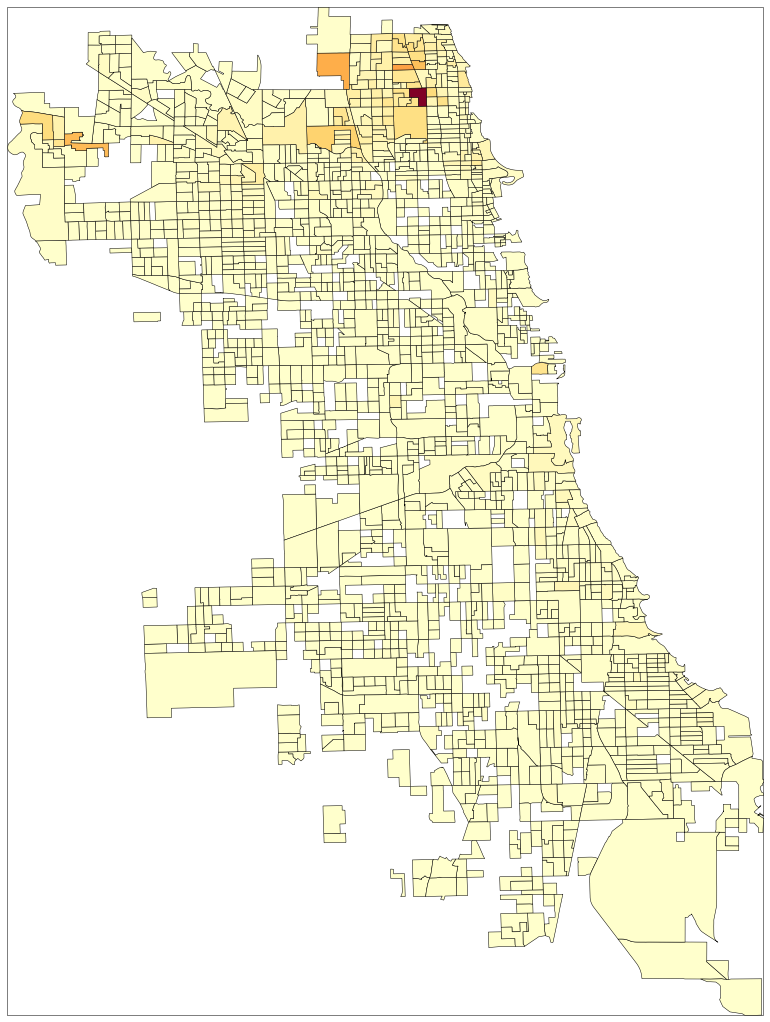

In [28]:
%%output backend='matplotlib'
%%output size=500
%%opts NdOverlay [aspect=0.75] Shape (cmap='YlOrRd', line_color='grey', line_width=0.1)
bg_shapes = cartopy.io.shapereader.Reader('taxi_ticket_data/immigration_acs_data/chi_block_groups.shp')
res_tix = hv.Dataset(chi_res_tix)
gv.Shape.from_records(bg_shapes.records(), res_tix, on='gisjoin', value='res_tickets',
                      index=['total_pop', 'native_pop', 'forgn_pop', 'forgn_pct', 'res_tickets'], crs=crs.PlateCarree())

### Block Groups by Foreign-Born % of Population


:NdOverlay   [total_pop,native_pop,forgn_pop,forgn_pct,res_tickets]
   :Shape   [Longitude,Latitude]   (forgn_pct)
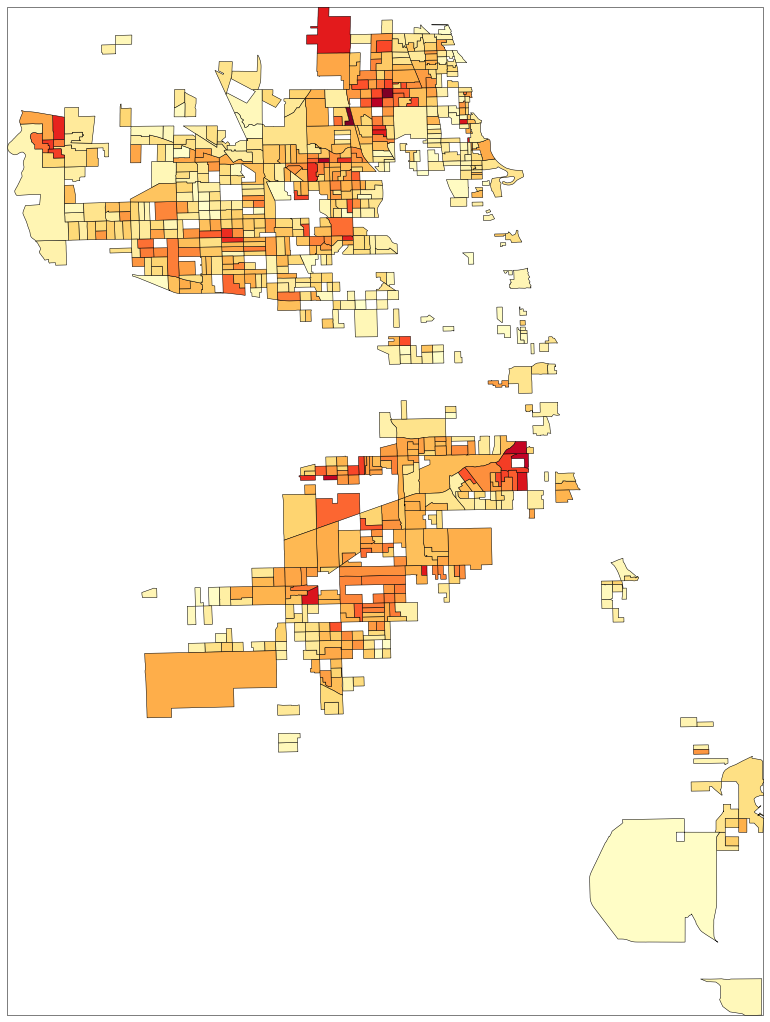

In [30]:
%%output backend='matplotlib'
%%output size=500
%%opts NdOverlay [aspect=0.75] Shape (cmap='YlOrRd', line_color='grey', line_width=0.1)
bg_shapes = cartopy.io.shapereader.Reader('taxi_ticket_data/immigration_acs_data/chi_block_groups.shp')
# Getting top 750 because it seems like plotting doesn't like having many 0 values
highest_foreign_pct = chi_res_tix.sort_values(by='forgn_pct', ascending=False)[:750]
res_tix = hv.Dataset(highest_foreign_pct)
gv.Shape.from_records(bg_shapes.records(), res_tix, on='gisjoin', value='forgn_pct',
                      index=['total_pop', 'native_pop', 'forgn_pop', 'forgn_pct', 'res_tickets'], crs=crs.PlateCarree())